# Mahtab Nejati
# 98209434
# Problem 02

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mpl_toolkits import mplot3d

## 1. Load in data

In [2]:
data = np.loadtxt('q2.txt',delimiter=',')

## 2. Split data into train and test with a 3:1 ratio

In [3]:
x_train, x_test, y_train, y_test = train_test_split(data[:,:2], data[:,2], test_size=0.25)

## 3. Scatter plot of training data

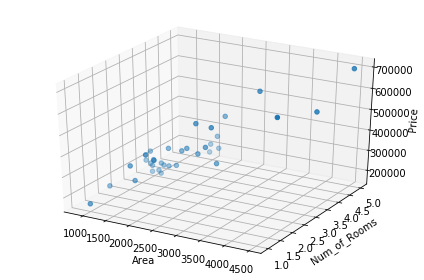

In [4]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x_train[:,0], x_train[:,1], y_train)
ax.set_xlabel('Area')
ax.set_ylabel('Num_of_Rooms')
ax.set_zlabel('Price')
fig.tight_layout()
plt.show()

## 4.1. Training the model

In [5]:
def hypothesis(theta,X):
    return np.matmul(X,theta).reshape(X.shape[0],1)

In [6]:
def update(theta,alpha,m,n,hypo,X,y):
    new_theta = theta.copy()
    new_theta[0] = theta[0] - (alpha/m) * sum(hypo - y)
    for i in range(1,n+1):
        new_theta[i] = theta[i] - (alpha/m) * sum((hypo-y) * X[:,i].reshape(X.shape[0],1))
    return new_theta

In [7]:
def cost_function(hypo,y):
    return 0.5*np.mean((hypo - y)**2)

In [8]:
def gradient_descent(theta,alpha,X,y,num_iters):
    m = X.shape[0]
    n = X.shape[1]-1
    cost = [].copy()
    hypo = hypothesis(theta,X)
    for i in range(num_iters):
        theta = update(theta,alpha,m,n,hypo,X,y)
        hypo = hypothesis(theta,X)
        cost.append(cost_function(hypo,y))
    return cost, theta

In [9]:
def linear_regression_fit_predict(X, y, alpha, num_iters):
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    theta = np.zeros(n+1).reshape(n+1,1)
    cost, theta = gradient_descent(theta,alpha,X,y,num_iters)
    predictions = hypothesis(theta,X)
    return cost, theta, predictions

## Normalizing while keeping track of normalizations

In [10]:
y_range = max(y_train)-min(y_train)
y_mean = np.mean(y_train)
y_train_togo = (y_train.reshape(len(y_train),1)-y_mean)/y_range

x_range = np.max(x_train,axis=0)-np.min(x_train,axis=0)
x_mean = np.mean(x_train,axis=0)
X_train_togo = (x_train-x_mean)/x_range


costs,theta,y_train_predicted = linear_regression_fit_predict(X_train_togo,y_train_togo,0.01,10000)

y_train_predicted = (y_range*y_train_predicted)+y_mean

## Cost (Error) over the iterations plot

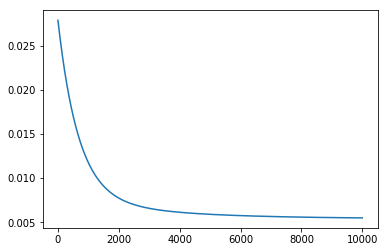

In [11]:
plt.plot(list(range(1,len(costs)+1)), costs)
plt.show()

## 4.2. Optimal line vs. scatter plot of tratining set

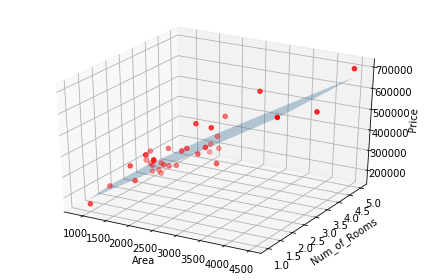

In [12]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x_train[:,0], x_train[:,1], y_train,color='red')
ax.plot_trisurf(x_train[:,0],x_train[:,1],y_train_predicted.flatten(),alpha=0.3)
ax.plot_trisurf
ax.set_xlabel('Area')
ax.set_ylabel('Num_of_Rooms')
ax.set_zlabel('Price')
fig.tight_layout()
plt.show()

## 5. Optimal line vs. scatter plot of test set

In [13]:
def linear_regression_predict(X,theta):
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    return hypothesis(theta,X)

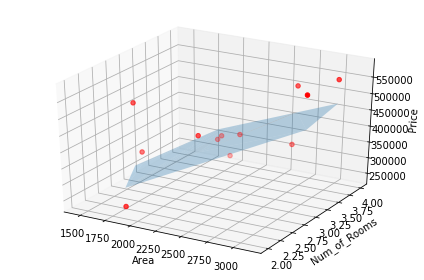

In [14]:
X_test_togo = (x_test-x_mean)/x_range
y_test_togo = (y_test.reshape(len(y_test),1)-y_mean)/y_range

y_test_predicted = linear_regression_predict(X_test_togo,theta)

y_test_predicted = (y_range*y_test_predicted)+y_mean

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x_test[:,0], x_test[:,1], y_test,color='red')
ax.plot_trisurf(x_test[:,0],x_test[:,1],y_test_predicted.flatten(),alpha=0.3)
ax.plot_trisurf
ax.set_xlabel('Area')
ax.set_ylabel('Num_of_Rooms')
ax.set_zlabel('Price')
fig.tight_layout()
plt.show()

## 6. MSE of training and test

In [15]:
def MSE(X,y,theta):
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    hypo = hypothesis(theta,X)
    return 2*cost_function(hypo,y)

In [16]:
train_mse = MSE(X_train_togo,y_train_togo,theta)
test_mse = MSE(X_test_togo,y_test_togo,theta)

print("MSE over Training Data:\t"+str(train_mse))
print("MSE over Test Data:\t"+str(test_mse))

MSE over Training Data:	0.010972402647521627
MSE over Test Data:	0.02685857668540341
